In [ ]:
rootpath="./"

In [8]:
import pandas as pd

print("Loading big matrix...")
big_matrix = pd.read_csv(rootpath + "data/big_matrix.csv")
print("Loading small matrix...")
small_matrix = pd.read_csv(rootpath + "data/small_matrix.csv")

print("Loading social network...")
social_network = pd.read_csv(rootpath + "data/social_network.csv")
social_network["friend_list"] = social_network["friend_list"].map(eval)

print("Loading item features...")
item_categories = pd.read_csv(rootpath + "data/item_categories.csv")
item_categories["feat"] = item_categories["feat"].map(eval)

print("Loading user features...")
user_features = pd.read_csv(rootpath + "data/user_features.csv")

print("Loading items' daily features...")
item_daily_features = pd.read_csv(rootpath + "data/item_daily_features.csv")

print("All data loaded.")

Loading big matrix...
Loading small matrix...
Loading social network...
Loading item features...
Loading user features...
Loading items' daily features...
All data loaded.


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
myfont = FontProperties(fname="./SimHei.ttf")

def visual_continue(df, func=None):
    ax = sns.distplot(df)
    if func:
        func(ax)
    
    gca = plt.gca()
    fig_title = "Statistics of {}".format(df.name)
    gca.set_title(fig_title, fontsize=14)
    gca.set_ylabel("Density", fontsize=14)
    gca.set_xlabel(df.name, fontsize=14)
    
    plt.show()

def visual_statistics_discrete(df, var="my_variable", display_ratio=True, func=None, order=None, size=(6, 4.5)):
    ncount = len(df)

    fig = plt.figure(figsize=size)
    ax1 = fig.add_axes([0.14, 0.15, 0.74, 0.75])
    sns.countplot(x=df, color="#9fc5e8", linewidth=.6, edgecolor='k', ax=ax1, order=order)


    plt.grid(axis='y', linestyle='-.')

    gca = plt.gca()
    fig_title = "Statistics of {}".format(var)
    gca.set_title(fig_title, fontsize=14)
    gca.set_ylabel("Count", fontsize=14)
    gca.set_xlabel(var, fontsize=14)
    
    if func:
        func(ax1)

    if display_ratio:
        ax2 = ax1.twinx()
        ax2.set_ylabel("ratio (%)", fontsize=14)


        for p in ax1.patches:
            x = p.get_bbox().get_points()[:, 0]
            y = p.get_bbox().get_points()[1, 1]
            ax1.annotate('{:.1f}%'.format(100. * y / ncount), (x.mean(), y),
                         ha='center', va='bottom', fontsize=10, rotation=30)

        ax2.set_ylim(0, ax1.get_ylim()[1] / ncount * 100)

    plt.show()

# Social Analysis

In [10]:
users_id = user_features["user_id"].unique()

In [11]:
len(users_id)

7176

Il y a 7176 utilisateurs au total

In [12]:
social_network["nb_friends"] = social_network["friend_list"].map(len)

count    472.000000
mean       1.419492
std        0.853295
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        5.000000
Name: friend_list, dtype: float64


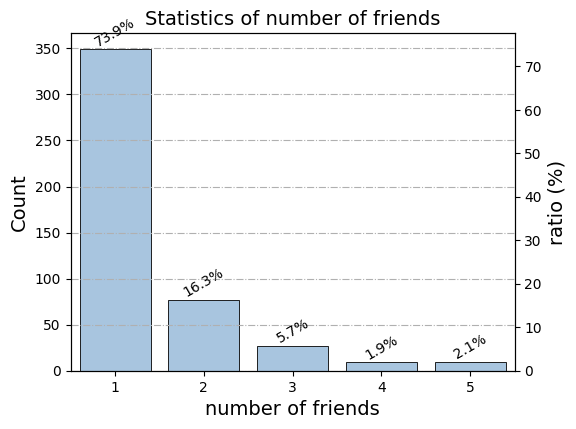

In [13]:
print(social_network.friend_list.map(len).describe())
visual_statistics_discrete(social_network.friend_list.map(len), "number of friends")

La très grande majorité des utilisateurs ont un seul ami.

In [14]:
len(social_network["user_id"].unique())

472

In [15]:
unique_friend_ids = set(friend for friends in social_network["friend_list"] for friend in friends)
print(len(unique_friend_ids))

472


In [16]:
unique_friend_ids - set(social_network["user_id"].unique())

set()

Etre ami signifie se suivre mutuellement. Seuelement 472 sur 7176 utilisateurs ont au moins un ami.

In [17]:
social_network.head()

,user_id,friend_list,nb_friends
0,3371,[2975],1
1,24,[2665],1
2,4402,[38],1
3,4295,[4694],1
4,7087,[7117],1


In [18]:
# On va chercher les amis d'un utilisateur donné et de ses amis jusqu'à un certain niveau de profondeur
def get_friends_recursive(user_id, n):
    if n <= 0:
        return set()  # Aucun ami à ce niveau
    
    # Trouver les amis directs de l'utilisateur
    friends = social_network.loc[social_network['user_id'] == user_id, 'friend_list']
    
    if friends.empty:
        return set()  # Retourner un ensemble vide si l'utilisateur n'a pas d'amis ou n'existe pas
    
    friends = set(friends.iloc[0])  # Convertir en ensemble pour éviter les doublons
    
    # Trouver les amis des amis récursivement
    for friend in list(friends):
        friends.update(get_friends_recursive(friend, n - 1))
    
    return friends

get_friends_recursive(6781, 3)

{4295, 4694, 6781}

In [19]:
average_friends = social_network["friend_list"].map(len).mean()
print(f"Le nombre moyen d'amis est : {average_friends}")
max_friends = social_network["friend_list"].map(len).max()
print(f"Le nombre maximum d'amis est : {max_friends}")

Le nombre moyen d'amis est : 1.4194915254237288
Le nombre maximum d'amis est : 5


# Video analysis

/var/folders/wj/yjxhfpzn5ssgymw3vblf52fh0000gn/T/ipykernel_41131/3680635393.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df)


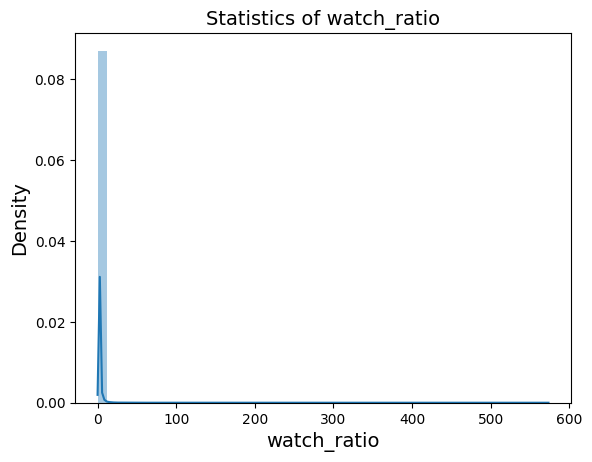

In [20]:
visual_continue(big_matrix["watch_ratio"])

In [21]:
print(small_matrix["watch_ratio"].describe())

count    4.676570e+06
mean     9.070695e-01
std      1.362324e+00
min      0.000000e+00
25%      4.675769e-01
50%      7.691666e-01
75%      1.120590e+00
max      5.715214e+02
Name: watch_ratio, dtype: float64


In [22]:
import numpy as np
print(np.log(big_matrix["watch_ratio"] + 1).describe())

count    1.253081e+07
mean     5.684151e-01
std      3.853869e-01
min      0.000000e+00
25%      2.737033e-01
50%      5.443403e-01
75%      7.782436e-01
max      6.353425e+00
Name: watch_ratio, dtype: float64


Distribution large et extrement asymétrique du watch_ratio

count    10728.000000
mean         1.183166
std          0.436205
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          4.000000
Name: feat, dtype: float64


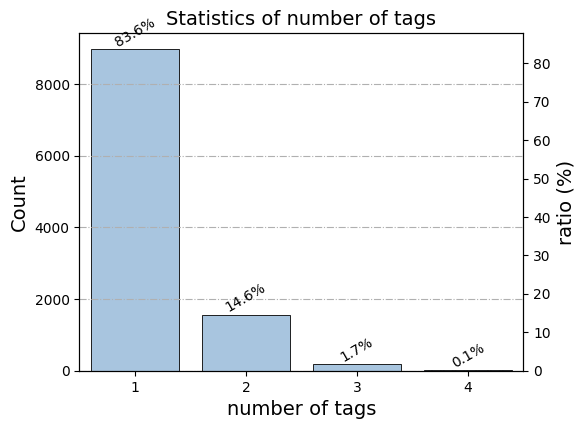

In [23]:
num_feat = item_categories.feat.map(len)
print(num_feat.describe())
visual_statistics_discrete(num_feat, "number of tags")

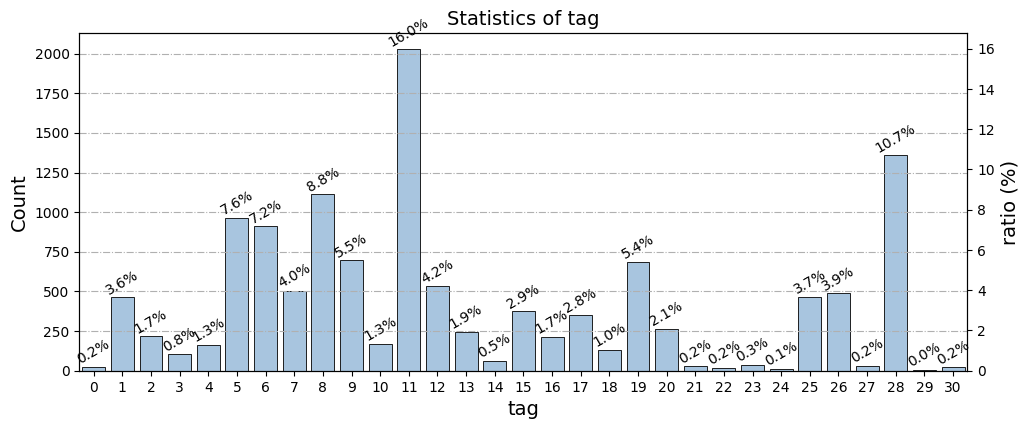

In [24]:
import collections
import itertools

cnt = item_categories.feat.map(collections.Counter)
cnt_all = collections.Counter()
for d in cnt:
    cnt_all.update(d)
# print(dict(cnt_all))
all_feat = pd.Series(sorted(list(itertools.chain.from_iterable([[i]*k for i,k in cnt_all.items()]))),name="feat")
# print(all_feat)
visual_statistics_discrete(all_feat, "tag", size=(12,4.5))

## Distribution of watch_ratio

count    1.241552e+07
mean     8.510664e-01
std      7.185296e-01
min      0.000000e+00
25%      3.111008e-01
50%      7.161066e-01
75%      1.161843e+00
max      5.000000e+00
Name: watch_ratio, dtype: float64


/var/folders/wj/yjxhfpzn5ssgymw3vblf52fh0000gn/T/ipykernel_41131/3680635393.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df)


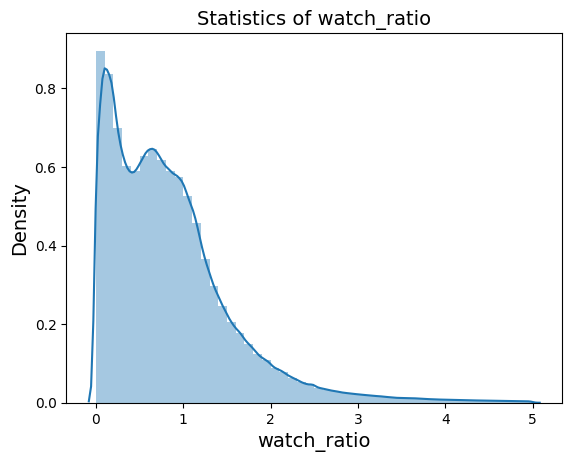

In [25]:
big_watch_ratio = big_matrix.watch_ratio[big_matrix.watch_ratio <= 5]
print(big_watch_ratio.describe())
visual_continue(big_watch_ratio)

count    4.653780e+06
mean     8.553870e-01
std      5.952060e-01
min      0.000000e+00
25%      4.657859e-01
50%      7.662410e-01
75%      1.114060e+00
max      5.000000e+00
Name: watch_ratio, dtype: float64


/var/folders/wj/yjxhfpzn5ssgymw3vblf52fh0000gn/T/ipykernel_41131/3680635393.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df)


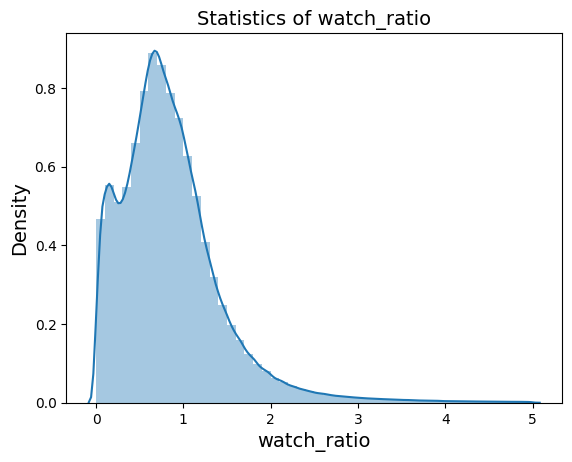

In [26]:
small_watch_ratio = small_matrix.watch_ratio[small_matrix.watch_ratio <= 5]
print(small_watch_ratio.describe())
visual_continue(small_watch_ratio)

# Interaction analysis

## Play time

               date
count   7176.000000
mean    1746.210424
std      991.832222
min      100.000000
25%      883.000000
50%     1846.500000
75%     2461.000000
max    16015.000000


/var/folders/wj/yjxhfpzn5ssgymw3vblf52fh0000gn/T/ipykernel_41131/3680635393.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df)


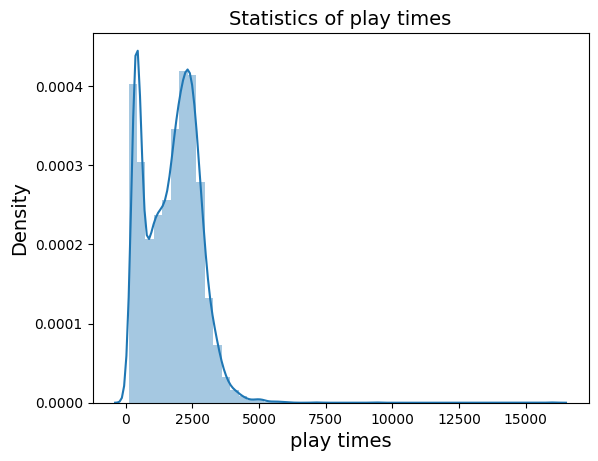

In [27]:
big_play_time = big_matrix.groupby('user_id').agg({"date":len})
big_play_time.name = "play times"
print(big_play_time.describe())
visual_continue(big_play_time)

              date
count  1411.000000
mean   3314.365698
std       6.984852
min    3295.000000
25%    3309.000000
50%    3315.000000
75%    3320.000000
max    3327.000000


/var/folders/wj/yjxhfpzn5ssgymw3vblf52fh0000gn/T/ipykernel_41131/3680635393.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df)


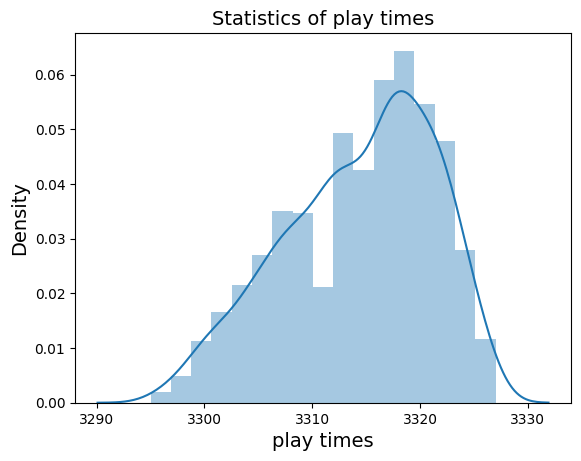

In [28]:
small_play_time = small_matrix.groupby('user_id').agg({"date":len})
small_play_time.name = "play times"
print(small_play_time.describe())
visual_continue(small_play_time)

count    188322.000000
mean         66.539257
std          78.752240
min           1.000000
25%          19.000000
50%          42.000000
75%          83.000000
max        3268.000000
Name: play times, dtype: float64


/var/folders/wj/yjxhfpzn5ssgymw3vblf52fh0000gn/T/ipykernel_41131/3680635393.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df)


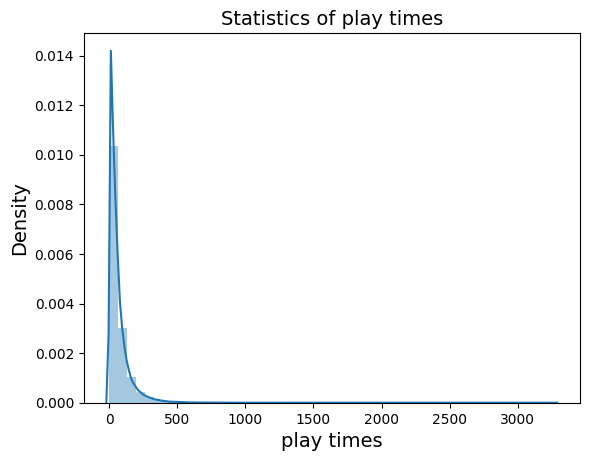

In [29]:
big_daily_play_time = big_matrix.groupby(['user_id', 'date']).size()
big_daily_play_time.name = "play times"
print(big_daily_play_time.describe())
visual_continue(big_daily_play_time)

count    86671.000000
mean        51.857922
std         32.608372
min          1.000000
25%         28.000000
50%         47.000000
75%         70.000000
max        402.000000
Name: play times, dtype: float64


/var/folders/wj/yjxhfpzn5ssgymw3vblf52fh0000gn/T/ipykernel_41131/3680635393.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df)


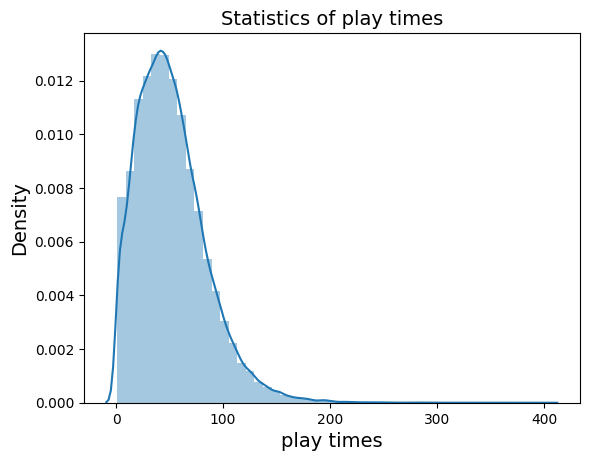

In [30]:
small_daily_play_time = small_matrix.groupby(['user_id', 'date']).size()
small_daily_play_time.name = "play times"
print(small_daily_play_time.describe())
visual_continue(small_daily_play_time)

## Tags analysis

In [31]:
big_matrix.watch_ratio.describe()

count    1.253081e+07
mean     9.445059e-01
std      1.674601e+00
min      0.000000e+00
25%      3.148246e-01
50%      7.234710e-01
75%      1.177644e+00
max      5.734571e+02
Name: watch_ratio, dtype: float64

In [32]:
len(big_matrix.user_id.unique())

7176

In [33]:
len(small_matrix.user_id.unique())

1411

In [34]:
all_users_in_big_matrix = small_matrix['user_id'].isin(big_matrix['user_id']).all()
print(f"All user_id in small_matrix are in big_matrix: {all_users_in_big_matrix}")

All user_id in small_matrix are in big_matrix: True


Il y a 1411 utilisateurs qui ont au moins une interaction avec une vidéo dans small matrix.

En fonction des heures de la journée

In [35]:
item_categories.head()

,video_id,feat
0,0,[8]
1,1,"[27, 9]"
2,2,[9]
3,3,[26]
4,4,[5]


In [36]:
interactions = big_matrix
interactions = interactions.dropna()
interactions = interactions.drop_duplicates()
interactions = interactions[interactions["timestamp"] >= 0]
interactions["timestamp"] = pd.to_datetime(
    interactions["timestamp"].fillna(0), unit="s"
)
interactions["hour"] = interactions["timestamp"].dt.hour
interactions["day"] = interactions["timestamp"].dt.dayofweek

In [37]:
interactions = interactions.merge(item_categories[['video_id', 'feat']], on='video_id', how='left')
interactions.rename(columns={"feat": "tags"}, inplace=True)

In [38]:
interactions.head()

,user_id,video_id,play_duration,video_duration,time,date,timestamp,watch_ratio,hour,day,tags
0,0,3649,13838,10867,2020-07-05 00:08:23.438,20200705,2020-07-04 16:08:23.437999964,1.273397,16,5,[9]
1,0,9598,13665,10984,2020-07-05 00:13:41.297,20200705,2020-07-04 16:13:41.296999931,1.244082,16,5,[28]
2,0,5262,851,7908,2020-07-05 00:16:06.687,20200705,2020-07-04 16:16:06.687000036,0.107613,16,5,[25]
3,0,1963,862,9590,2020-07-05 00:20:26.792,20200705,2020-07-04 16:20:26.792000055,0.089885,16,5,"[9, 28]"
4,0,8234,858,11000,2020-07-05 00:43:05.128,20200705,2020-07-04 16:43:05.128000020,0.078000,16,5,[6]


In [39]:
interactions_exploded = interactions.explode('tags')
tag_counts = interactions_exploded.groupby(['hour', 'tags']).size().reset_index(name='count')

# Find the most popular tag per hour
most_popular_tags = tag_counts.loc[tag_counts.groupby('hour')['count'].idxmax()]

print(most_popular_tags)

     hour  tags   count
28      0    28  145866
59      1    28  147673
90      2    28  155786
121     3    28  156084
152     4    28  156552
183     5    28  148738
214     6    28  137624
245     7    28  134885
276     8    28  123822
307     9    28  115308
338    10    28  110163
369    11    28  106705
400    12    28   99964
431    13    28   87541
462    14    28   71131
493    15    28   56928
524    16    28  101177
555    17    28   97172
586    18    28   88152
617    19    28   82652
648    20    28   89093
679    21    28  110071
710    22    28  133373
741    23    28  145940


/var/folders/wj/yjxhfpzn5ssgymw3vblf52fh0000gn/T/ipykernel_41131/382781429.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=tag_counts_no_hour, x='tags', y='count', palette="viridis")


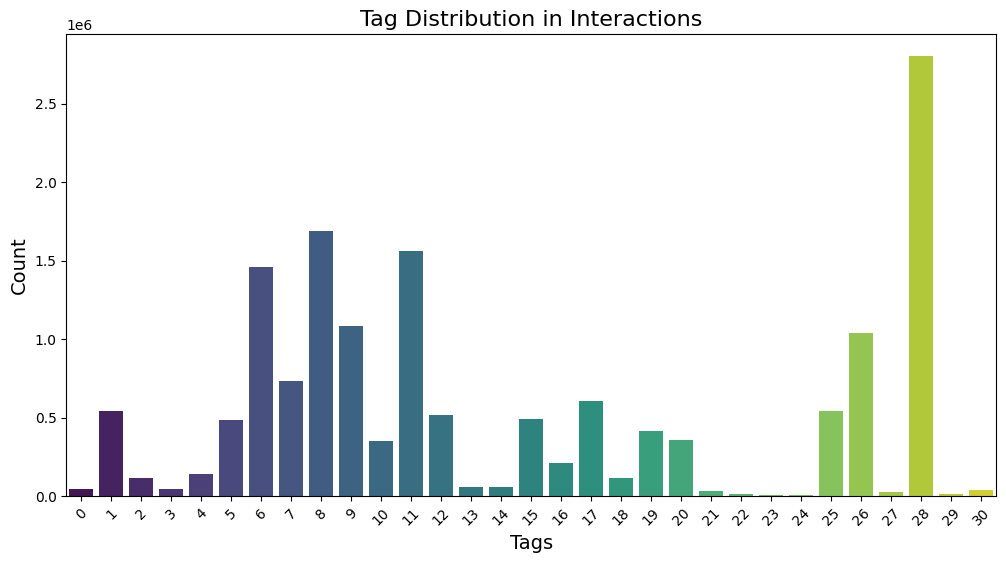

In [40]:
# Group by tags and count occurrences
tag_counts_no_hour = interactions_exploded.groupby('tags').size().reset_index(name='count')

# Plot the distribution
plt.figure(figsize=(12, 6))
sns.barplot(data=tag_counts_no_hour, x='tags', y='count', palette="viridis")
plt.title("Tag Distribution in Interactions", fontsize=16)
plt.xlabel("Tags", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=45)
plt.show()

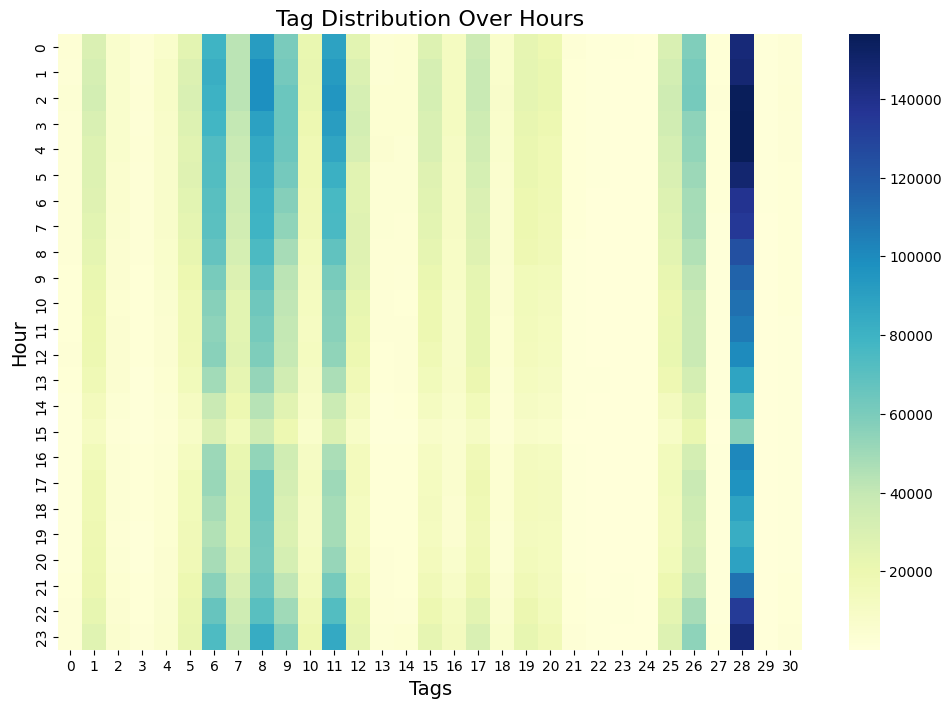

In [41]:
# Group by hour and tags, and count occurrences
hourly_tag_counts = interactions_exploded.groupby(['hour', 'tags']).size().unstack(fill_value=0)

# Plot a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(hourly_tag_counts, cmap="YlGnBu", annot=False, cbar=True)
plt.title("Tag Distribution Over Hours", fontsize=16)
plt.xlabel("Tags", fontsize=14)
plt.ylabel("Hour", fontsize=14)
plt.show()

In [42]:
user_tag_counts = interactions_exploded.groupby(['user_id', 'tags']).size().reset_index(name='count')

# Find the most popular tag for each user
most_popular_tags_per_user = user_tag_counts.loc[user_tag_counts.groupby('user_id')['count'].idxmax()]

print(most_popular_tags_per_user)

        user_id  tags  count
28            0    28    619
58            1    28    526
72            2    11    165
120           3    28    701
145           4    26     93
...         ...   ...    ...
210133     7171     9    189
210183     7172    28    473
210208     7173    28    201
210238     7174    28    308
210266     7175    28    514

[7176 rows x 3 columns]


In [43]:
most_popular_tags_per_user.tags.unique()

array([28, 11, 26,  6,  8, 12,  9,  5, 25, 19])

Les utilisateurs ont tous pour tag préféré le tag 28

In [44]:
from ipywidgets import interact
user_tag_counts = interactions_exploded.groupby(['hour', 'user_id', 'tags']).size().reset_index(name='count')

# Find the most popular tag per hour and per user
most_popular_user_tags_per_hour = user_tag_counts.loc[user_tag_counts.groupby(['hour', 'user_id'])['count'].idxmax()]

print(most_popular_user_tags_per_hour)

         hour  user_id  tags  count
22          0        0    28     32
40          0        1    28     18
45          0        2     7     13
76          0        3    28     54
93          0        4    26      9
...       ...      ...   ...    ...
2365864    23     7171    11      6
2365878    23     7172     8     38
2365903    23     7173    11      5
2365936    23     7174    28     38
2365948    23     7175    28     12

[148159 rows x 4 columns]


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact
sampled_users = most_popular_user_tags_per_hour['user_id'].sample(10).unique()

def plot_user_tags(user_id):
    user_data = most_popular_user_tags_per_hour[most_popular_user_tags_per_hour['user_id'] == user_id]
    plt.figure(figsize=(12, 6))
    sns.barplot(data=user_data, x='hour', y='count', hue='tags', palette='Set2')
    plt.title(f'Most Popular Tags per Hour for User {user_id}')
    plt.xlabel('Hour')
    plt.ylabel('Count')
    plt.legend(title='Tags', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

interact(plot_user_tags, user_id=sampled_users)

interactive(children=(Dropdown(description='user_id', options=(6826, 3351, 6342, 4528, 1908, 2121, 5728, 6783,…

<function __main__.plot_user_tags(user_id)>

Observons les différence entre le tags préféré et le tag le plus populaire à l'heure de la journée

In [46]:
merged_df = most_popular_user_tags_per_hour.merge(
    most_popular_tags_per_user, on='user_id', suffixes=('_hour', '_user')
)

# Check if the 'tags' match
merged_df['tags_match'] = merged_df['tags_hour'] == merged_df['tags_user']

# Display the result
print(merged_df[['hour', 'user_id', 'tags_hour', 'tags_user', 'tags_match']])


        hour  user_id  tags_hour  tags_user  tags_match
0          0        0         28         28        True
1          0        1         28         28        True
2          0        2          7         11       False
3          0        3         28         28        True
4          0        4         26         26        True
...      ...      ...        ...        ...         ...
148154    23     7171         11          9       False
148155    23     7172          8         28       False
148156    23     7173         11         28       False
148157    23     7174         28         28        True
148158    23     7175         28         28        True

[148159 rows x 5 columns]


In [47]:
false_counts_per_user = merged_df[~merged_df['tags_match']].groupby('user_id').size().reset_index(name='false_count')
print(false_counts_per_user)

      user_id  false_count
0           0            6
1           1            3
2           2           17
3           3           12
4           4           15
...       ...          ...
7057     7171           19
7058     7172            8
7059     7173           10
7060     7174            9
7061     7175            2

[7062 rows x 2 columns]


In [48]:
false_counts_per_user["false_count"].describe()

count    7062.000000
mean        8.580997
std         4.814255
min         1.000000
25%         5.000000
50%         8.000000
75%        12.000000
max        23.000000
Name: false_count, dtype: float64

In [49]:
false_tags_match = merged_df[~merged_df['tags_match']]

In [50]:
false_tags_match["count_hour"].describe()

count    60599.000000
mean        11.147692
std         14.099967
min          1.000000
25%          3.000000
50%          6.000000
75%         14.000000
max        504.000000
Name: count_hour, dtype: float64

In [51]:
merged_df["count_hour"].describe()

count    148159.000000
mean         20.457792
std          20.991513
min           1.000000
25%           5.000000
50%          14.000000
75%          29.000000
max         504.000000
Name: count_hour, dtype: float64

In [52]:
false_tags_match[false_tags_match["count_hour"] == 113]

,hour,user_id,tags_hour,count_hour,tags_user,count_user,tags_match
147966,23,6972,8,113,28,970,False


## with caption information

In [54]:
# Sed command to replace Chinese comma with semicolon
# Command run on mac may need to be adjusted for other OS
!sed -i '' 's/，/;/g' data/kuairec_caption_category.csv
captions = pd.read_csv(rootpath + "data/kuairec_caption_category.csv", engine='python')
captions = captions[pd.to_numeric(captions['video_id'], errors='coerce').notna()]

sed: data/kuairec_caption_category.csv: No such file or directory


In [55]:
captions['video_id'] = captions['video_id'].astype(int)
interactions = small_matrix.merge(captions, on="video_id", how="left")

In [56]:
interactions = interactions.dropna()
interactions = interactions.drop_duplicates()
interactions = interactions[interactions["timestamp"] >= 0]
interactions["timestamp"] = pd.to_datetime(
    interactions["timestamp"].fillna(0), unit="s"
)
interactions["hour"] = interactions["timestamp"].dt.hour
interactions["day"] = interactions["timestamp"].dt.dayofweek

tag level 1

In [57]:
interactions = interactions.merge(item_categories[['video_id', 'feat']], on='video_id', how='left')
interactions.rename(columns={"first_level_category_id": "tags"}, inplace=True)

In [58]:
interactions_exploded = interactions.explode('tags')
tag_counts = interactions_exploded.groupby(['hour', 'tags']).size().reset_index(name='count')

# Find the most popular tag per hour
most_popular_tags = tag_counts.loc[tag_counts.groupby('hour')['count'].idxmax()]

print(most_popular_tags)

     hour  tags  count
27      0  28.0  50215
65      1  28.0  46881
103     2  28.0  45547
141     3  28.0  44749
179     4  28.0  45779
217     5  28.0  40458
255     6  28.0  36887
293     7  28.0  34146
331     8  28.0  31322
369     9  28.0  29823
407    10  28.0  29817
445    11  28.0  28120
483    12  28.0  25570
521    13  28.0  23330
559    14  28.0  20883
597    15  28.0  16512
635    16  28.0  45776
673    17  28.0  42208
711    18  28.0  36932
749    19  28.0  32904
787    20  28.0  30677
825    21  28.0  35210
863    22  28.0  44269
901    23  28.0  50157


In [ ]:
most_popular_tags_per_user["third_level_category_id"].unique()

In [ ]:
tag_counts = interactions.groupby(['hour', 'second_level_category_id']).size().reset_index(name='count')

# Find the most popular tag per hour
most_popular_tags = tag_counts.loc[tag_counts.groupby('hour')['count'].idxmax()]

print(most_popular_tags)

      hour  second_level_category_id  count
0        0                    -124.0  61291
109      1                    -124.0  61221
218      2                    -124.0  59683
327      3                    -124.0  56267
436      4                    -124.0  54773
545      5                    -124.0  48881
654      6                    -124.0  45260
763      7                    -124.0  42235
872      8                    -124.0  38602
981      9                    -124.0  35474
1090    10                    -124.0  34483
1199    11                    -124.0  31450
1308    12                    -124.0  29848
1417    13                    -124.0  27673
1526    14                    -124.0  23439
1635    15                    -124.0  18960
1744    16                    -124.0  43352
1853    17                    -124.0  47233
1962    18                    -124.0  44928
2071    19                    -124.0  42127
2180    20                    -124.0  40453
2289    21                    -1

In [ ]:
user_tag_counts = interactions.groupby(['hour', 'user_id', 'second_level_category_id']).size().reset_index(name='count')

# Find the most popular tag per hour and per user
most_popular_user_tags_per_hour = user_tag_counts.loc[user_tag_counts.groupby(['hour', 'user_id'])['count'].idxmax()]

print(most_popular_user_tags_per_hour)

        hour  user_id  second_level_category_id  count
0          0       14                    -124.0     11
27         0       19                     223.0     31
48         0       21                    -124.0     43
99         0       23                     223.0     38
128        0       24                    -124.0     66
...      ...      ...                       ...    ...
992977    23     7142                    -124.0     43
993016    23     7147                    -124.0      3
993025    23     7153                    -124.0     87
993077    23     7159                    -124.0     16
993106    23     7162                    -124.0     46

[31079 rows x 4 columns]


### En fonction du watch ratio

In [ ]:
interactions = small_matrix
interactions = interactions.dropna()
interactions = interactions.drop_duplicates()
interactions = interactions[interactions["timestamp"] >= 0]
interactions["timestamp"] = pd.to_datetime(
    interactions["timestamp"].fillna(0), unit="s"
)
interactions["hour"] = interactions["timestamp"].dt.hour
interactions["day"] = interactions["timestamp"].dt.dayofweek

In [ ]:
interactions = interactions.merge(item_categories[['video_id', 'feat']], on='video_id', how='left')
interactions.rename(columns={"feat": "tags"}, inplace=True)

In [ ]:
interactions_exploded = interactions.explode('tags')
tag_watch_ratio = interactions_exploded.groupby(['user_id', 'tags'])['watch_ratio'].mean().reset_index()

# Find the tag with the highest watch_ratio for each user
most_popular_tag_by_watch_ratio = tag_watch_ratio.loc[tag_watch_ratio.groupby('user_id')['watch_ratio'].idxmax()]

print(most_popular_tag_by_watch_ratio)

       user_id  tags  watch_ratio
23          14    23     1.577827
54          19    23     1.222518
91          21    29     1.153105
122         23    29     1.346682
124         24     0     1.475632
...        ...   ...          ...
43586     7142    24     1.325084
43611     7147    18     1.106756
43642     7153    18     1.159270
43669     7159    14     1.223694
43700     7162    14     1.452891

[1411 rows x 3 columns]


/var/folders/wj/yjxhfpzn5ssgymw3vblf52fh0000gn/T/ipykernel_1834/2559342379.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=tag_watch_ratio_mean, x='tags', y='watch_ratio', palette="viridis")


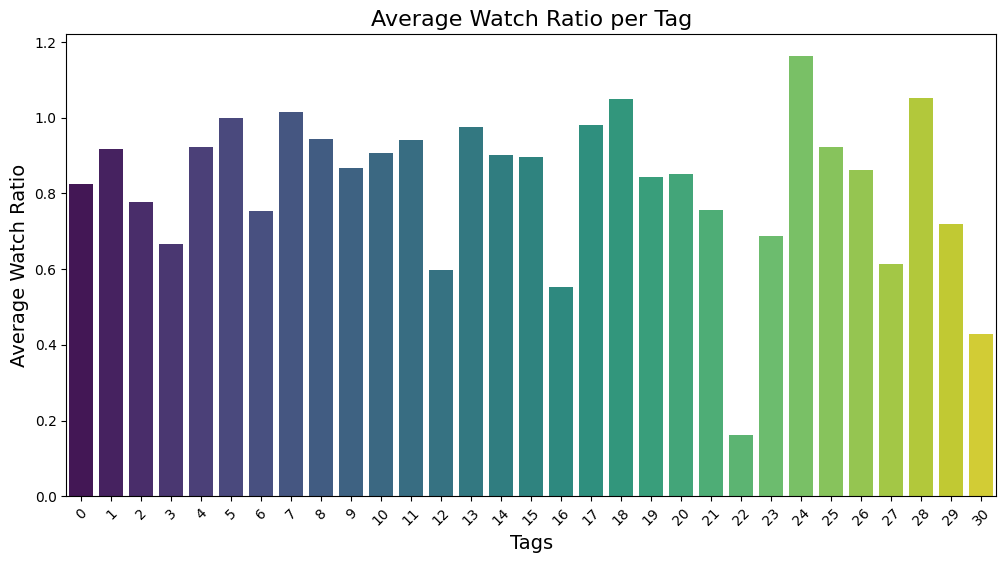

In [ ]:
import seaborn as sns

import matplotlib.pyplot as plt

# Calculate the mean watch ratio for each tag
tag_watch_ratio_mean = tag_watch_ratio.groupby('tags')['watch_ratio'].mean().reset_index()

# Plot the distribution
plt.figure(figsize=(12, 6))
sns.barplot(data=tag_watch_ratio_mean, x='tags', y='watch_ratio', palette="viridis")
plt.title("Average Watch Ratio per Tag", fontsize=16)
plt.xlabel("Tags", fontsize=14)
plt.ylabel("Average Watch Ratio", fontsize=14)
plt.xticks(rotation=45)
plt.show()

In [ ]:
most_popular_tag_by_watch_ratio.tags.unique()

array([23, 29,  0, 24, 14,  1,  5, 28, 18, 10,  7,  4, 11,  2, 25, 13, 19,
       21, 15, 27, 20,  3, 17,  8, 30, 26, 16, 22])

In [ ]:
user_tag_watch_ratio = interactions_exploded.groupby(['user_id', 'tags'])['watch_ratio'].mean().reset_index()

# Group by user_id and calculate the mean difference of watch_ratio between all tags
mean_diff_per_user = user_tag_watch_ratio.groupby('user_id')['watch_ratio'].apply(lambda x: x.max() - x.min()).reset_index()

mean_diff_per_user.rename(columns={'watch_ratio': 'mean_watch_ratio_difference'}, inplace=True)

print(mean_diff_per_user)

      user_id  mean_watch_ratio_difference
0          14                     1.436241
1          19                     1.043025
2          21                     1.050296
3          23                     1.290916
4          24                     1.375182
...       ...                          ...
1406     7142                     1.176994
1407     7147                     0.929475
1408     7153                     1.040506
1409     7159                     1.161400
1410     7162                     1.267155

[1411 rows x 2 columns]


In [ ]:
mean_diff_per_user.mean_watch_ratio_difference.describe()

count    1411.000000
mean        1.457014
std         1.363661
min         0.506241
25%         0.950076
50%         1.154118
75%         1.490930
max        34.421353
Name: mean_watch_ratio_difference, dtype: float64

In [ ]:
import numpy as np
tag_28_watch_ratio = interactions_exploded.loc[
    interactions_exploded['tags'] == 28, ['user_id', 'watch_ratio']
].groupby('user_id', as_index=False)['watch_ratio'].mean().rename(
    columns={'watch_ratio': 'tag_28_watch_ratio'}
)

merged_watch_ratios = interactions_exploded.merge(tag_28_watch_ratio, on='user_id', how='inner')

# Calculate the difference between the watch ratio of all tags and tag 28
merged_watch_ratios['watch_ratio_diff'] = np.abs(merged_watch_ratios['watch_ratio'] - merged_watch_ratios['tag_28_watch_ratio'])

mean_diff_tag_28 = merged_watch_ratios.groupby('user_id', as_index=False)['watch_ratio_diff'].mean().rename(
    columns={'watch_ratio_diff': 'mean_watch_ratio_diff_with_tag_28'}
)

print(mean_diff_tag_28)

      user_id  mean_watch_ratio_diff_with_tag_28
0          14                           0.582740
1          19                           0.312073
2          21                           0.435034
3          23                           0.941191
4          24                           0.730054
...       ...                                ...
1406     7142                           0.306854
1407     7147                           0.360836
1408     7153                           0.551233
1409     7159                           0.484552
1410     7162                           0.649393

[1411 rows x 2 columns]


In [ ]:
mean_diff_tag_28.mean_watch_ratio_diff_with_tag_28.describe()

count    1411.000000
mean        0.516035
std         0.251450
min         0.231209
25%         0.361163
50%         0.438654
75%         0.580861
max         2.495145
Name: mean_watch_ratio_diff_with_tag_28, dtype: float64

## Analyse des créateurs

In [60]:
creator = (item_daily_features.author_id.unique())
print(f"Le nombre d'auteurs uniques est : {len(creator)}")

Le nombre d'auteurs uniques est : 8369


In [61]:
interactions = big_matrix
interactions = interactions.dropna()
interactions = interactions.drop_duplicates()
interactions = interactions[interactions["timestamp"] >= 0]
interactions["timestamp"] = pd.to_datetime(
    interactions["timestamp"].fillna(0), unit="s"
)
interactions["hour"] = interactions["timestamp"].dt.hour
interactions["day"] = interactions["timestamp"].dt.dayofweek

In [62]:
interactions = interactions.merge(item_daily_features[['video_id', 'author_id']], on='video_id', how='left')

In [63]:
user_author_counts = interactions.groupby(['user_id', 'author_id']).size().reset_index(name='count')
# Find the most popular author_id for each user
most_popular_authors_per_user = user_author_counts.loc[user_author_counts.groupby('user_id')['count'].idxmax()]
print(most_popular_authors_per_user)

         user_id  author_id  count
1136           0       6280   1129
2146           1       6229    878
3138           2       6805    309
4543           3       5690   1339
5521           4       6476    382
...          ...        ...    ...
7554844     7171       1959    489
7556592     7172       6280    948
7557341     7173       6280    601
7558537     7174       6805    380
7559556     7175       6280   1286

[7176 rows x 3 columns]


/var/folders/wj/yjxhfpzn5ssgymw3vblf52fh0000gn/T/ipykernel_41131/2148137873.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=author_counts.index, y=author_counts.values, palette="viridis")


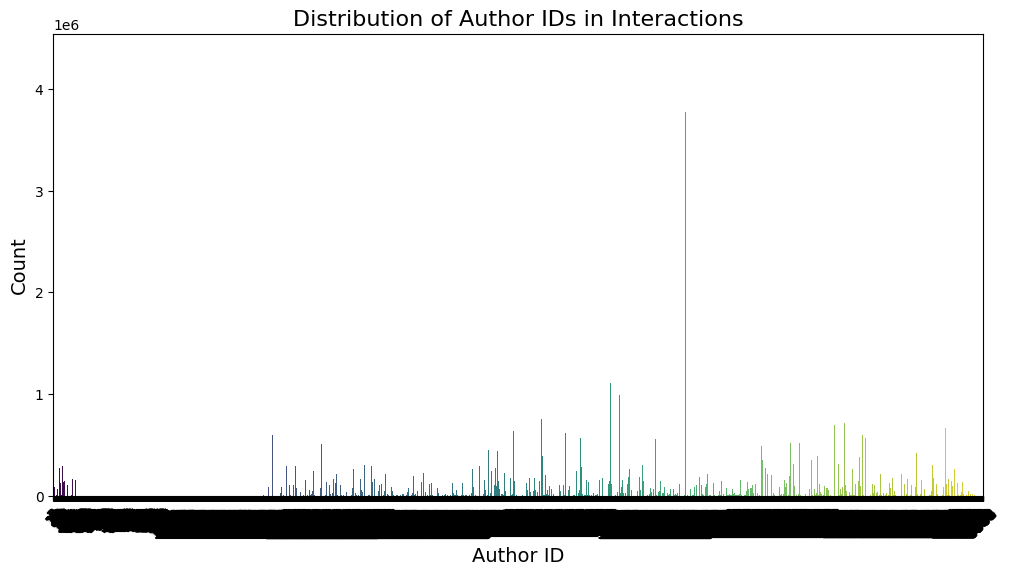

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns
# Count occurrences of each author_id
author_counts = interactions['author_id'].value_counts()

# Plot the distribution
plt.figure(figsize=(12, 6))
sns.barplot(x=author_counts.index, y=author_counts.values, palette="viridis")
plt.title("Distribution of Author IDs in Interactions", fontsize=16)
plt.xlabel("Author ID", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=45)
plt.show()

In [65]:
most_popular_authors_per_user["author_id"].unique()

array([6280, 6229, 6805, 5690, 6476, 6748, 1017, 7318, 1798, 2661, 5359,
       1959, 4860, 7634, 5637, 6124, 8047, 1650, 1867, 3698, 5245, 2121,
       7657, 6475, 1532, 6824, 5415, 2606, 7121,  630, 7672,  289, 7207,
        353, 5108, 1445, 2639, 4403, 6770,   59, 1193, 5059, 3315, 4893,
        456,  217, 6341, 6681, 5194, 3977, 1471, 2808, 4561, 4869, 7911,
         60, 7504, 4061, 2962, 7488,  308, 5097,  482, 1854,  542, 3033,
       2383, 4118, 1402, 5299, 7626, 7193, 1741, 5560, 3126,  918,  262,
        395, 4542, 7016, 7388, 7694, 6785, 1464, 6990,  358, 5640,  341,
       3758, 1052,  379, 4139, 3998, 6009, 7970, 1485, 1807, 2863, 5957,
        595, 3684,  207,  801, 2443,  280, 1219, 4220, 5473, 2366,  283,
       6297, 1188, 2479, 6295, 7363, 3832, 7281,  927, 4610, 4455, 2946,
       3091, 2998,  180, 4319,  826, 7303, 7077, 6871, 5791, 2127,  302,
       6095, 4112, 7331, 5346, 3158, 5666, 2293, 4371, 5662, 6920, 5890,
       6783, 1835, 4809, 1430, 2068,  626, 6367, 47

Seuelemnt 2 créateurs préférés.

En watch ratio :

In [66]:
# Group by user_id and author_id, and calculate the mean watch_ratio
author_watch_ratio = interactions.groupby(['user_id', 'author_id'])['watch_ratio'].mean().reset_index()

# Find the author_id with the highest mean watch_ratio for each user
most_popular_author_by_watch_ratio = author_watch_ratio.loc[author_watch_ratio.groupby('user_id')['watch_ratio'].idxmax()]

# Display the result
print(most_popular_author_by_watch_ratio)

         user_id  author_id  watch_ratio
1023           0       5757   130.818866
1828           1       3314    12.744632
2852           2       3855     9.740617
5023           3       7613     8.828416
5428           4       4821     5.253691
...          ...        ...          ...
7554835     7171       1875    40.547995
7555861     7172       1632    16.217628
7557010     7173       1076    68.960643
7558454     7174       6344     5.949489
7559240     7175       4042    34.724777

[7176 rows x 3 columns]


/var/folders/wj/yjxhfpzn5ssgymw3vblf52fh0000gn/T/ipykernel_41131/1897082108.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=author_watch_ratio_mean, x='author_id', y='watch_ratio', palette="viridis")


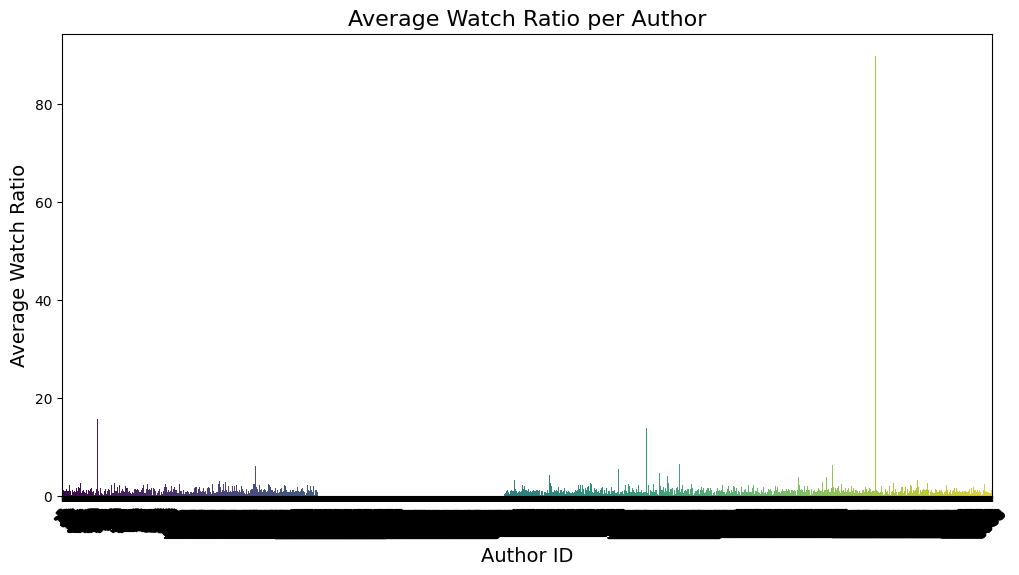

In [67]:
# Calculate the mean watch ratio for each author
author_watch_ratio_mean = interactions.groupby('author_id')['watch_ratio'].mean().reset_index()

# Plot the distribution
plt.figure(figsize=(12, 6))
sns.barplot(data=author_watch_ratio_mean, x='author_id', y='watch_ratio', palette="viridis")
plt.title("Average Watch Ratio per Author", fontsize=16)
plt.xlabel("Author ID", fontsize=14)
plt.ylabel("Average Watch Ratio", fontsize=14)
plt.xticks(rotation=45)
plt.show()

In [68]:
len(most_popular_author_by_watch_ratio["author_id"].unique())

2514

In [69]:
user_author_counts_per_hour = interactions.groupby(['hour', 'user_id', 'author_id']).size().reset_index(name='count')

# Find the most popular author_id per user and per hour
most_popular_authors_per_user_hour = user_author_counts_per_hour.loc[
    user_author_counts_per_hour.groupby(['hour', 'user_id'])['count'].idxmax()
]

print(most_popular_authors_per_user_hour)

          hour  user_id  author_id  count
93           0        0       5560    124
206          0        1       7488    114
238          0        2       5424    116
386          0        3       5690    160
484          0        4       6671     98
...        ...      ...        ...    ...
10594714    23     7171         46     63
10594861    23     7172       5194    180
10594941    23     7173       3091     92
10594974    23     7174        645    224
10595100    23     7175        876     63

[148159 rows x 4 columns]


In [76]:
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact
# Add an interactive widget to select a user from a sample
sampled_users = most_popular_authors_per_user_hour['user_id'].sample(10).unique()

def plot_user_tags(user_id):
    user_data = most_popular_authors_per_user_hour[most_popular_authors_per_user_hour['user_id'] == user_id]
    plt.figure(figsize=(12, 6))
    sns.barplot(data=user_data, x='hour', y='count', hue='author_id', palette='Set2')
    plt.title(f'Most Popular Author per Hour for User {user_id}')
    plt.xlabel('Hour')
    plt.ylabel('Count')
    plt.legend(title='Tags', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

# Interactive widget to select user_id from the sample
interact(plot_user_tags, user_id=sampled_users)

interactive(children=(Dropdown(description='user_id', options=(1814, 3350, 7156, 1182, 1517, 4638, 2996, 2206,…

<function __main__.plot_user_tags(user_id)>

In [71]:
# Group by hour and user_id, and count the number of unique authors
authors_per_hour_per_user = interactions.groupby(['hour', 'user_id'])['author_id'].nunique().reset_index(name='unique_authors_count')
mean_unique_authors_per_user = authors_per_hour_per_user.groupby('user_id')['unique_authors_count'].mean()
mean_unique_authors_per_user.describe()

count    7176.000000
mean       73.660283
std        42.550509
min         4.238095
25%        35.244318
50%        76.371711
75%       101.851786
max       354.857143
Name: unique_authors_count, dtype: float64

In [72]:
print(authors_per_hour_per_user)

        hour  user_id  unique_authors_count
0          0        0                   161
1          0        1                    50
2          0        2                    38
3          0        3                   209
4          0        4                    37
...      ...      ...                   ...
148154    23     7171                    46
148155    23     7172                   166
148156    23     7173                    39
148157    23     7174                   134
148158    23     7175                    31

[148159 rows x 3 columns]


Comparons l'auteur préféré et le créateur le plus populaire à l'heure de la journée

In [73]:
merged_authors_df = most_popular_authors_per_user_hour.merge(
    most_popular_authors_per_user, on='user_id', suffixes=('_hour', '_global')
)
merged_authors_df['author_match'] = merged_authors_df['author_id_hour'] == merged_authors_df['author_id_global']
print(merged_authors_df[['hour', 'user_id', 'author_id_hour', 'author_id_global', 'author_match']])

        hour  user_id  author_id_hour  author_id_global  author_match
0          0        0            5560              6280         False
1          0        1            7488              6229         False
2          0        2            5424              6805         False
3          0        3            5690              5690          True
4          0        4            6671              6476         False
...      ...      ...             ...               ...           ...
148154    23     7171              46              1959         False
148155    23     7172            5194              6280         False
148156    23     7173            3091              6280         False
148157    23     7174             645              6805         False
148158    23     7175             876              6280         False

[148159 rows x 5 columns]


In [74]:
false_counts_per_user_authors = merged_authors_df[~merged_authors_df['author_match']].groupby('user_id').size().reset_index(name='false_count')
print(false_counts_per_user_authors)

      user_id  false_count
0           0           21
1           1           16
2           2           22
3           3           20
4           4           20
...       ...          ...
7171     7171           22
7172     7172           19
7173     7173           18
7174     7174           22
7175     7175           18

[7176 rows x 2 columns]


In [75]:
false_counts_per_user_authors.false_count.describe()

count    7176.000000
mean       18.884476
std         3.480823
min         2.000000
25%        16.000000
50%        19.000000
75%        22.000000
max        24.000000
Name: false_count, dtype: float64

# Analyse captions

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
captions.head()

,video_id,manual_cover_text,caption,topic_tag,first_level_category_id,first_level_category_name,second_level_category_id,second_level_category_name,third_level_category_id,third_level_category_name
0,0,UNKNOWN,精神小伙路难走 程哥你狗粮慢点撒,[],8.0,颜值,673.0,颜值随拍,-124.0,UNKNOWN
1,1,UNKNOWN,NaN,[],27.0,高新数码,-124.0,UNKNOWN,-124.0,UNKNOWN
2,2,UNKNOWN,晚饭后;运动一下！,[],9.0,喜剧,727.0,搞笑互动,-124.0,UNKNOWN
3,3,UNKNOWN,我平淡无奇;惊艳不了时光;温柔不了岁月;我只想漫无目的的走走;努力发笔小财;给自己买花 自己长大.,[],26.0,摄影,686.0,主题摄影,2434.0,景物摄影
4,4,五爱街最美美女 一天1q,#搞笑 #感谢快手我要上热门 #五爱市场 这真是完美搭配啊！,"[五爱市场,感谢快手我要上热门,搞笑]",5.0,时尚,737.0,营销售卖,2596.0,女装


In [ ]:
all_video_ids_in_captions = small_matrix['video_id'].astype(int).isin(captions['video_id'].astype(int)).all()
print(f"All video_id in small_matrix are in captions: {all_video_ids_in_captions}")

All video_id in small_matrix are in captions: True


/var/folders/wj/yjxhfpzn5ssgymw3vblf52fh0000gn/T/ipykernel_49000/2967596200.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette="viridis")


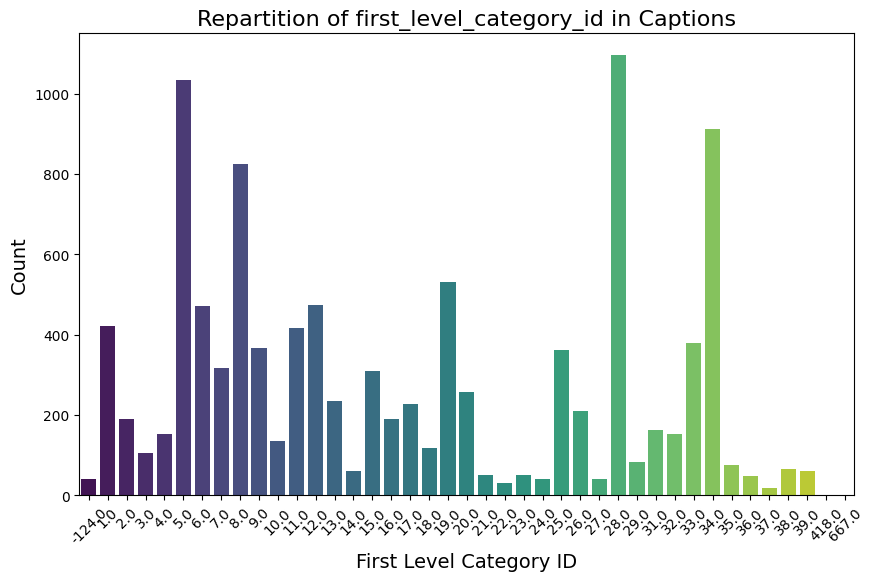

In [ ]:
import seaborn as sns

# Count occurrences of each first_level_category_id
category_counts = captions['first_level_category_id'].value_counts()

# Plot the distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.index, y=category_counts.values, palette="viridis")
plt.title("Repartition of first_level_category_id in Captions", fontsize=16)
plt.xlabel("First Level Category ID", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=45)
plt.show()

/var/folders/wj/yjxhfpzn5ssgymw3vblf52fh0000gn/T/ipykernel_49000/3213408937.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette="viridis")


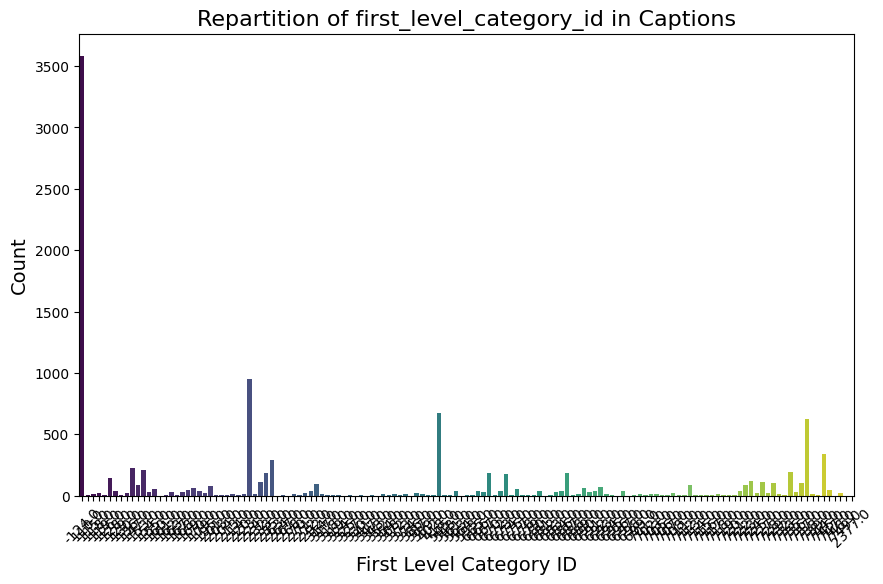

In [ ]:
# Count occurrences of each first_level_category_id
category_counts = captions['second_level_category_id'].value_counts()

# Plot the distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.index, y=category_counts.values, palette="viridis")
plt.title("Repartition of first_level_category_id in Captions", fontsize=16)
plt.xlabel("First Level Category ID", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=45)
plt.show()

/var/folders/wj/yjxhfpzn5ssgymw3vblf52fh0000gn/T/ipykernel_49000/922326402.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette="viridis")


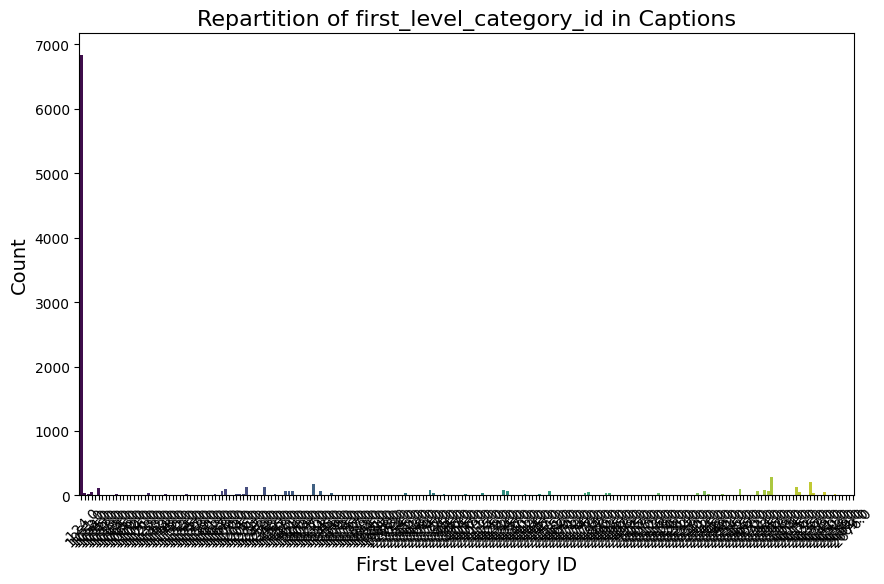

In [ ]:
# Count occurrences of each first_level_category_id
category_counts = captions['third_level_category_id'].value_counts()

# Plot the distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.index, y=category_counts.values, palette="viridis")
plt.title("Repartition of first_level_category_id in Captions", fontsize=16)
plt.xlabel("First Level Category ID", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=45)
plt.show()

In [ ]:
captions.third_level_category_id.describe()

count    10724.000000
mean       661.434446
std       1104.049489
min       -124.000000
25%       -124.000000
50%       -124.000000
75%       1524.000000
max       2676.000000
Name: third_level_category_id, dtype: float64

In [ ]:
captions = captions[pd.to_numeric(captions['video_id'], errors='coerce').notna()]

In [ ]:
captions.video_id.describe()

count     10728
unique    10728
top           0
freq          1
Name: video_id, dtype: object

In [ ]:
small_matrix.video_id.describe()

count    4.676570e+06
mean     4.974939e+03
std      3.064622e+03
min      1.030000e+02
25%      2.369000e+03
50%      4.692000e+03
75%      7.474000e+03
max      1.059500e+04
Name: video_id, dtype: float64

In [ ]:
captions.video_id.duplicated().sum()

0